# Wine Quality Data Set Analysis

## Introduction 
> In this project, I will be analyzing the Wine Quality dataset from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

### I will be exploring white wine data , red wine data and then I will be combining the data to compare red & white  wine.  I will try to answer the following questions:
>Which type of wine (red or white) associated with higher quality?

>What level of acidity (pH value) receives the highest average rating?

>Do wines with higher alcoholic content receive better ratings?

>Do sweeter wines receive better ratings?

>What is proportion of the quality ratings for each wine type? 

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Load Data Directly from the url

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

r = requests.post(url)
if r.ok:
    data = r.content.decode('utf8')
    df_w = pd.read_csv(io.StringIO(data),sep = ";")

In [3]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

r1 = requests.post(url1)
if r1.ok:
    data1 = r1.content.decode('utf8')
    df_r = pd.read_csv(io.StringIO(data1),sep = ";")

# Analysis 

### Lets check about the characteristics of the datasets:

>number of samples in each dataset

>number of columns in each dataset

>features with missing values

>duplicate rows in the white wine dataset

>number of unique values for quality in each dataset

>mean density of the red wine dataset

In [4]:
print(df_w.shape)
print(df_r.shape)


df_w.info()
df_r.info()


(4898, 12)
(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns

In [5]:
df_r.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [6]:
df_w[df_w.duplicated()].count()

fixed acidity           937
volatile acidity        937
citric acid             937
residual sugar          937
chlorides               937
free sulfur dioxide     937
total sulfur dioxide    937
density                 937
pH                      937
sulphates               937
alcohol                 937
quality                 937
dtype: int64

In [7]:
df_r["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df_w["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [9]:
df_r['density'].mean()

0.9967466791744833

# Combining DataFrames

In [10]:
import numpy as np

In [11]:
# create color array for red dataframe
color_red = np.repeat('red',df_r.shape[0])

# create color array for white dataframe
color_white = np.repeat('white',df_w.shape[0])

In [12]:
df_w['color'] = color_white
df_r['color'] = color_red


In [13]:
# append dataframes
df = df_w.append(df_r,ignore_index=True)

# view dataframe to check for success
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


# EDA

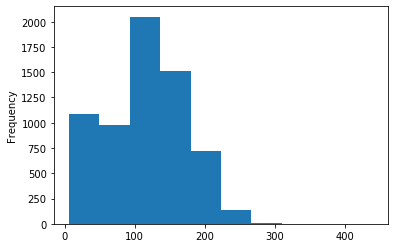

In [14]:
df["total sulfur dioxide"].plot(kind="hist");

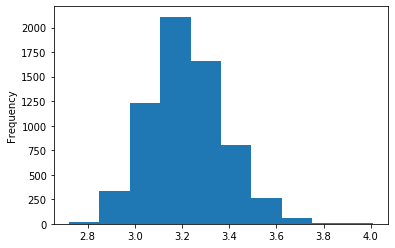

In [15]:
df["pH"].plot(kind="hist");

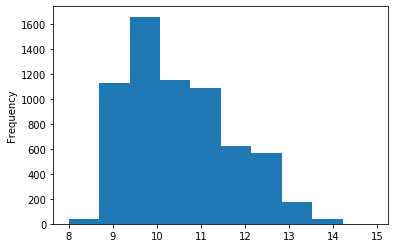

In [16]:
df["alcohol"].plot(kind="hist");

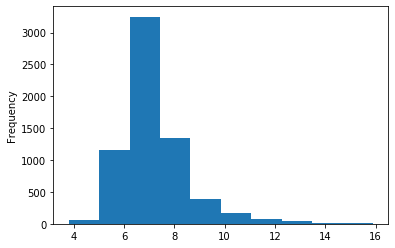

In [17]:
df["fixed acidity"].plot(kind="hist");

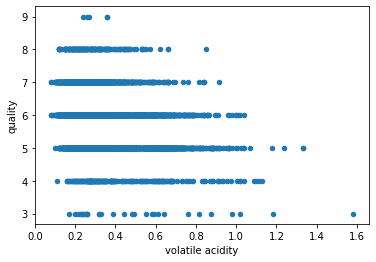

In [18]:
df.plot(x="volatile acidity", y="quality", kind="scatter");

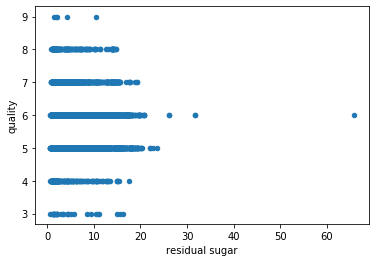

In [19]:
df.plot(x="residual sugar", y="quality", kind="scatter");

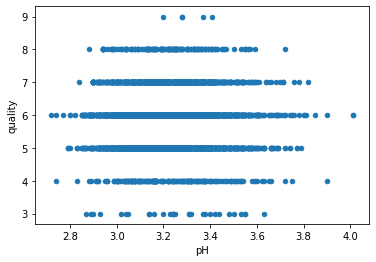

In [20]:
df.plot(x="pH", y="quality", kind="scatter");

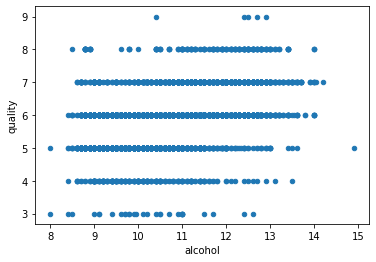

In [21]:
df.plot(x="alcohol", y="quality", kind="scatter");

We can see a positive relation to quality with alcohol here. 

### Now we will find out which type of wine (red or white) associated with higher quality?

In [22]:
df.groupby(by="color")["quality"].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

**Red wine has higer avearge quality than white wine.**

### What level of acidity (pH value) receives the highest average rating?

In [23]:
# View the min, 25%, 50%, 75%, max pH values
df["pH"].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [24]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.74,3.21,3.31 ,3.40, 4.01 ] 

In [25]:
# Labels for the four acidity level groups
bin_names = ['High','Moderately' ,'Medium','Low' ]

In [26]:
# Creates acidity_levels column
df["acidity_level"] = pd.cut(df["pH"],bin_edges,labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Moderately
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Moderately
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,High


In [27]:
# Find the mean quality of each acidity level with groupby
df.groupby(df.iloc[:,-1])["quality"].mean()

acidity_level
High          5.784395
Moderately    5.844864
Medium        5.909881
Low           5.809949
Name: quality, dtype: float64

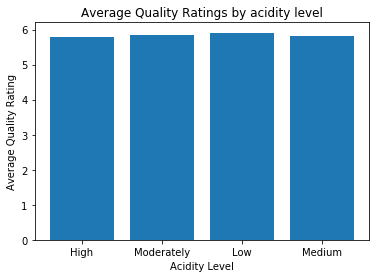

In [28]:
mean_acidity_level = df.groupby('acidity_level')['quality'].mean()

loca = [1,2,3,4]
labe = list(df.acidity_level.unique())
labe = labe[:-1]
labe
plt.bar(loca,mean_acidity_level,tick_label = labe)
plt.title("Average Quality Ratings by acidity level")
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

**Medium acidity level received higest average quality rating.**

###  Do wines with higher alcoholic content receive better ratings?

In [29]:
# get the median amount of alcohol content
df.alcohol.median()

10.3

In [30]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [31]:
low_alcohol['quality'].mean()

5.475920679886686

In [32]:
high_alcohol['quality'].mean()

6.146084337349397

In [33]:
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

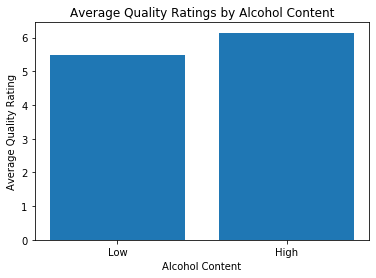

In [34]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

**Yes, wines with higher alcohol content received higher rating in these samoples.**

### Do sweeter wines receive better ratings?

In [35]:
df["residual sugar"].median()

3.0

In [36]:
# select samples with residual sugar less than the median
low_sugar = df[df['residual sugar'] < 3 ]

# select samples with residual sugar greater than or equal to the median
high_sugar = df[df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [37]:
# get mean quality rating for the low sugar and high sugar groups
print(f'quality rating for low sugar is {round(low_sugar.quality.mean(),2)}')
print(f'quality rating for high sugar is {round(high_sugar.quality.mean(),2)}')

quality rating for low sugar is 5.81
quality rating for high sugar is 5.83


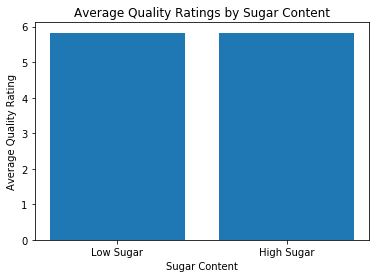

In [38]:

mean_sug_low = low_sugar['quality'].mean()
mean_sug_high = high_sugar['quality'].mean()
loc = [1,2]
yval = [mean_sug_low,mean_sug_high]
lab = ['Low Sugar','High Sugar']
plt.bar(loc, yval, tick_label=lab)
plt.title("Average Quality Ratings by Sugar Content")
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

**Sweeter wines recived higher average rating by 0.02 more.** 

### Proportion for different quality ratings for red and white wine 

In [39]:
color_count = df.groupby(['color','quality'])['pH'].count()
color_count

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [40]:
color_total = df.groupby('color')['pH'].count()
color_total

color
red      1599
white    4898
Name: pH, dtype: int64

In [41]:
red_proportion = color_count['red'] / color_total['red']
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [42]:
white_proportion = color_count['white'] / color_total['white']
white_proportion

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [43]:
red_proportion[9] = 0
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [44]:
ind = np.arange(len(white_proportion))
w = 0.3

C:\Users\Shivam\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


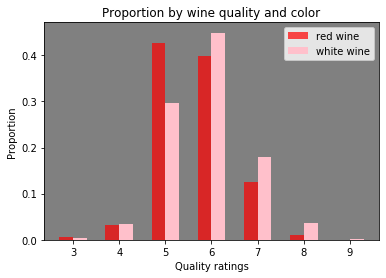

In [45]:
red_bar = plt.bar(ind,red_proportion,color='r',label= 'red wine',width=w,alpha = 0.7)
white_bar = plt.bar(ind+w,white_proportion,color='pink',width = w,label = 'white wine')

plt.title("Proportion by wine quality and color")
plt.xlabel("Quality ratings")
plt.ylabel("Proportion")
placing = ind+w /2
plt.xticks(placing,[3,4,5,6,7,8,9]);
plt.legend()
ax = plt.axes();
ax.set_facecolor('grey')


We can see for quality rating 3,4 & 5 , red wine has higher number of proportion. 

For quality rating 6,7,8 & 9 , white wine has higher proportion. 

# Conclusion

**After exploring and performing data analysis on this data, we can conclude about this sample:**
>Red wine has higer avearge quality than white wine.

>Medium acidity level received higest average quality rating.

>Wines with higher alcohol content received higher rating in these samoples. 

>Sweeter wines recived higher average rating.

>White wine received higher proportion of high quality ratings and red wine received higher proportion of quality ratings for lower quality ratings. 

**Reference**

>UCI Machine Learning Repository: Wine Quality Data Set. (2020). Archive.ics.uci.edu. Retrieved 3 May 2020, from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

>Udacity. (2020). Classroom.udacity.com. Retrieved 3 May 2020, from https://classroom.udacity.com/nanodegrees/nd002/parts/6f1ba175-1429-48e9-ab26-44d08ab21e7e/modules/77a69f88-993e-4b5e-8576-a135209e29bf/lessons/31a04b0e-aac8-4099-99cb-6d8b9391ea0b/concepts/c0ca0232-f586-4156-a28b-3669bdb5395b
